SQL DB conncted


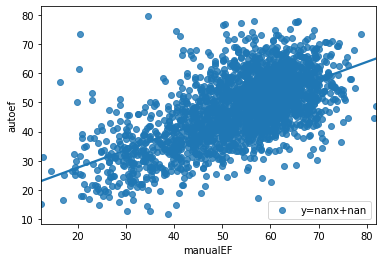

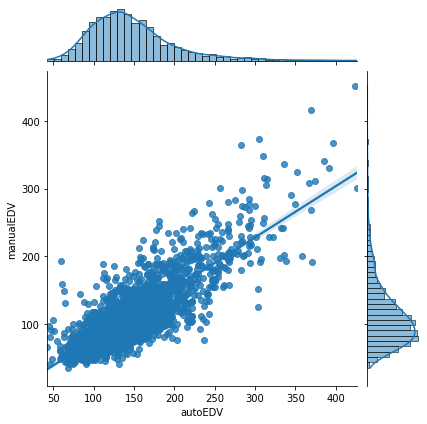

In [51]:
import io
import os
from tqdm import tqdm
import pyodbc
import shutil
import sqlserverport
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

#sudo docker run -e "ACCEPT_EULA=Y" -e "SA_PASSWORD=ThatIsAPassword1234" -p 1433:1433 --name sql1 -h sql1 -d mcr.microsoft.com/mssql/server:2019-latest

class CHandleDatabase:


    def __init__(self):
        self._cursor = self.connect_db()


    # open database connection
    def connect_db(self):
        server = 'localhost'
        database = 'DeepLearning'
        port = "1433"

        self.cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER=' + server + ';PORT='+port+';DATABASE=' + database + ';UID=sa;PWD=ThatIsAPassword2020', timeout=30)
        cursor = self.cnxn.cursor()
        print("SQL DB conncted")
        return cursor

    def getAutoEFResults(self):
        #self._cursor.execute('SELECT autoef,manualEF,autoEDV,manualEDV, manualESC,AutoESV,grade FROM dbo.GetAutoResults')
        df = pd.read_sql_query('SELECT * FROM dbo.GetAutoResults where autoef!=99999900', self.cnxn)
        return  df

 

def main():

    ## Initialise DB class
    DBHandler = CHandleDatabase()

    # Get besta4c
    df = DBHandler.getAutoEFResults()

    slope, intercept, r_value, pv, se = stats.linregress(df['autoEDV'],df['manualEDV'])
        
    #sns.regplot(x="alcohol", y="magnesium", data=df, 
    #  ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")

   # sns.lmplot(x ='autoEDV', y='manualEDV',data=df,fit_reg=True) 
    sns.regplot(x="manualEF", y="autoef", data=df, ci=None, label="y={0:.1f}x+{1:.1f}".format(slope, intercept)).legend(loc="best")
    sns.jointplot(x="autoEDV", y="manualEDV", data=df, kind="reg");

    import numpy as np
    import matplotlib.pyplot as plt  # To visualize
    import pandas as pd  # To read data
    from sklearn.linear_model import LinearRegression
    data = pd.read_csv('data.csv')  # load data set
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()  # create object for the class
    linear_regressor.fit(X, Y)  # perform linear regression
    Y_pred = linear_regressor.predict(X)  # make predictions
    plt.scatter(X, Y)
    plt.plot(X, Y_pred, color='red')
    plt.show()




if __name__ == "__main__":
    main()
